In [30]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.nn.modules.utils import _pair
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

# BP Baseline

In [88]:
from genhebb import FastMNIST
from baseline import Baseline

In [93]:
baseline = Baseline()
baseline.load_state_dict(torch.load('saved_models/baseline-50epochs-lr0.001-batch64.pt'))

<All keys matched successfully>

**Results from Cajal:**

Training...
Epoch [1/50], Loss: 0.188
Epoch [2/50], Loss: 0.080
Epoch [3/50], Loss: 0.058
Epoch [4/50], Loss: 0.043
Epoch [5/50], Loss: 0.034
Epoch [6/50], Loss: 0.030
Epoch [7/50], Loss: 0.027
Epoch [8/50], Loss: 0.021
Epoch [9/50], Loss: 0.026
Epoch [10/50], Loss: 0.023
Epoch [11/50], Loss: 0.014
Epoch [12/50], Loss: 0.017
Epoch [13/50], Loss: 0.017
Epoch [14/50], Loss: 0.017
Epoch [15/50], Loss: 0.016
Epoch [16/50], Loss: 0.013
Epoch [17/50], Loss: 0.013
Epoch [18/50], Loss: 0.017
Epoch [19/50], Loss: 0.010
Epoch [20/50], Loss: 0.014
Epoch [21/50], Loss: 0.012
Epoch [22/50], Loss: 0.011
Epoch [23/50], Loss: 0.012
Epoch [24/50], Loss: 0.016
Epoch [25/50], Loss: 0.010
Epoch [26/50], Loss: 0.009
Epoch [27/50], Loss: 0.009
Epoch [28/50], Loss: 0.009
Epoch [29/50], Loss: 0.016
Epoch [30/50], Loss: 0.008
Epoch [31/50], Loss: 0.013
Epoch [32/50], Loss: 0.009
Epoch [33/50], Loss: 0.012
Epoch [34/50], Loss: 0.008
Epoch [35/50], Loss: 0.013
Epoch [36/50], Loss: 0.012
Epoch [37/50], Loss: 0.015
Epoch [38/50], Loss: 0.004
Epoch [39/50], Loss: 0.019
Epoch [40/50], Loss: 0.013
Epoch [41/50], Loss: 0.008
Epoch [42/50], Loss: 0.010
Epoch [43/50], Loss: 0.009
Epoch [44/50], Loss: 0.012
Epoch [45/50], Loss: 0.011
Epoch [46/50], Loss: 0.006
Epoch [47/50], Loss: 0.009
Epoch [48/50], Loss: 0.011
Epoch [49/50], Loss: 0.008
Epoch [50/50], Loss: 0.011
Testing...
Accuracy: 98.33 %
Loss: 0.004

In [104]:
baseline.output.weight.shape

torch.Size([10, 2000])

# Hebb's Rule

In [99]:
from genhebb import GenHebb

In [100]:
genhebb = GenHebb(28*28, 2000, 10, 'hebbs_rule')

In [101]:
genhebb.load_state_dict(torch.load('saved_models/genhebb-hebbs_rule-1unsup_epochs-50sup_epochs-0.001lr-64batch.pt'))

<All keys matched successfully>

In [103]:
genhebb.unsup_layer.W.shape

torch.Size([784, 2000])

In [68]:
model.unsup_layer.W

tensor(1183.5065, grad_fn=<CopyBackwards>)

**Results from Cajal (1 epoch):**

Epoch [1/50]
Train loss: 0.610, 	 train accuracy: 81 %
Test loss: 0.080, 	 test accuracy: 86 %

Epoch [11/50]
Train loss: 0.215, 	 train accuracy: 93 %
Test loss: 0.076, 	 test accuracy: 89 %

Epoch [21/50]
Train loss: 0.177, 	 train accuracy: 94 %
Test loss: 0.094, 	 test accuracy: 89 %

Epoch [31/50]
Train loss: 0.146, 	 train accuracy: 95 %
Test loss: 0.111, 	 test accuracy: 89 %

Epoch [41/50]
Train loss: 0.132, 	 train accuracy: 96 %
Test loss: 0.132, 	 test accuracy: 89 %

Epoch [50/50]
Train loss: 0.124, 	 train accuracy: 96 %
Test loss: 0.141, 	 test accuracy: 89 %

### Investigate unsup layer weight matrix

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=2)

In [79]:
images, labels = next(iter(DataLoader(trainset, batch_size=5000, shuffle=True)))

In [80]:
x = images.reshape(-1, 28*28)
x_proj = pca.fit_transform(x)

In [81]:
Wx = model.unsup_layer(x)
Wx_proj = pca.fit_transform(Wx.detach())

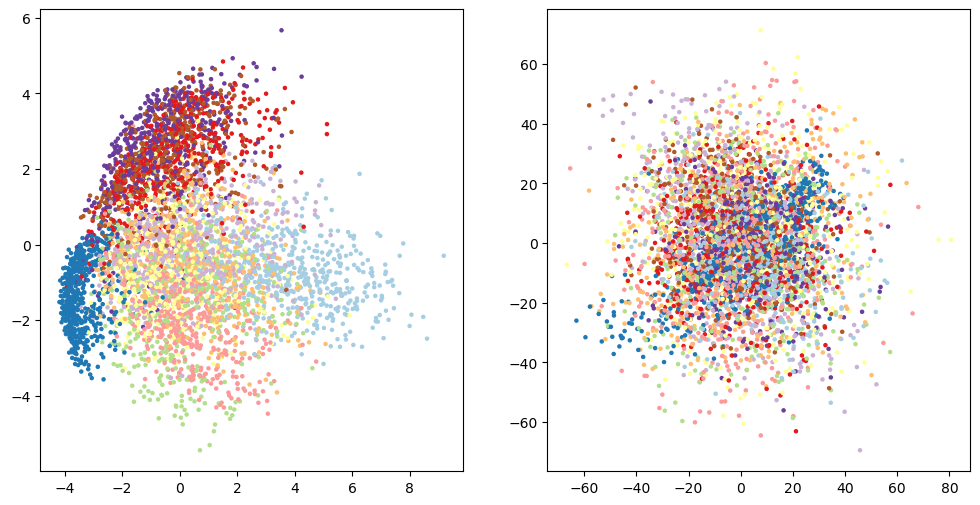

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(x_proj[:, 0], x_proj[:, 1], c=labels, cmap='Paired', s=5)
axes[1].scatter(Wx_proj[:, 0], Wx_proj[:, 1], c=labels, cmap='Paired', s=5)

# Alternative Baseline: Random Frozen Weights

**Results from Cajal:**

Epoch [1/50]
train loss: 0.463 	 train accuracy: 90 %
test loss: 0.063 	 test accuracy: 92 %

Epoch [11/50]
train loss: 0.171 	 train accuracy: 97 %
test loss: 0.066 	 test accuracy: 96 %

Epoch [21/50]
train loss: 0.117 	 train accuracy: 98 %
test loss: 0.115 	 test accuracy: 94 %

Epoch [31/50]
train loss: 0.089 	 train accuracy: 98 %
test loss: 0.106 	 test accuracy: 95 %

Epoch [41/50]
train loss: 0.081 	 train accuracy: 98 %
test loss: 0.115 	 test accuracy: 96 %

Epoch [50/50]
train loss: 0.056 	 train accuracy: 99 %
test loss: 0.131 	 test accuracy: 95 %